## Solving a Regression Problem Using ANN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf


2024-02-23 04:59:19.742735: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-23 04:59:22.188420: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 04:59:22.188588: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 04:59:22.590337: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-23 04:59:23.318504: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-23 04:59:23.320635: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()

In [4]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [29]:
x=pd.DataFrame(housing.data, columns=housing.feature_names)
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
y=pd.DataFrame(housing.target, columns=['target'])
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [8]:
x.shape , y.shape

((20640, 8), (20640, 1))

In [9]:
x_train_full, x_test,y_train_full,y_test = train_test_split(x,y,random_state=42)

In [10]:
x_train,x_valid,y_train,y_valid = train_test_split(x_train_full,y_train_full,random_state=42)

In [11]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((11610, 8), (5160, 8), (11610, 1), (5160, 1))

In [12]:
x_train.shape[1]

8

In [13]:
layers = [
    tf.keras.layers.Dense(30,activation="relu",input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
]

In [14]:
model = tf.keras.models.Sequential(layers)

In [15]:
model.compile(loss="mean_squared_error",optimizer="sgd")

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 591 (2.31 KB)
Trainable params: 591 (2.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
scaler = StandardScaler()
# standardize the data before training the model
x_train  = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)



In [18]:
history = model .fit(x_train,y_train ,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8150 - val_loss: 0.4943
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4544 - val_loss: 0.3959
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4092 - val_loss: 0.3778
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4068 - val_loss: 0.3665
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3832 - val_loss: 0.3774
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3731 - val_loss: 0.3493
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3669 - val_loss: 0.3423
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3606 - val_loss: 0.3376
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3543 - val_loss: 0.3388
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3497 - val_loss: 0.3254

In [19]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 363}

In [20]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.814951,0.494286
1,0.454424,0.395870
2,0.409174,0.377768
3,0.406765,0.366451
4,0.383208,0.377411
5,0.373090,0.349344
6,0.366853,0.342256
7,0.360570,0.337554
8,0.354313,0.338779
9,0.349728,0.325365


<Axes: >

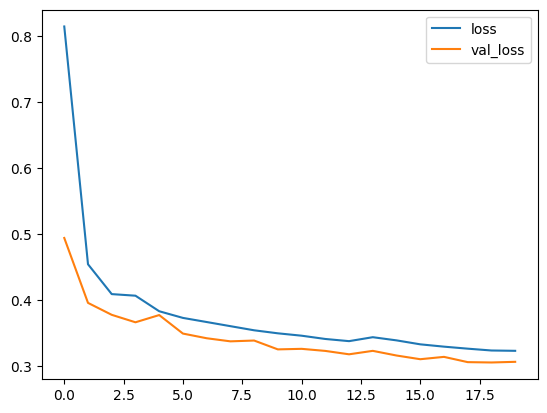

In [21]:
pd.DataFrame(history.history).plot()

In [22]:
model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3236


0.32362809777259827

In [23]:
x_test.shape

(5160, 8)

In [24]:
model.predict(x_test)

 35/162 [=====>........................] - ETA: 0s

162/162 [==============================] - 0s 1ms/step


array([[0.7079208],
       [1.549364 ],
       [4.431176 ],
       ...,
       [1.59327  ],
       [2.706634 ],
       [4.3111506]], dtype=float32)

In [25]:
model.predict(x_test[:3])

1/1 [==============================] - 0s 18ms/step


array([[0.7079208],
       [1.549364 ],
       [4.4311757]], dtype=float32)

In [26]:
model.save("./DeepLearning/Regression_Using_ANN_1.h5")

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
%load_ext tensorboard